<a href="https://colab.research.google.com/github/naruemonssp/multivariate/blob/main/Exam01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### นำข้อมูลเข้าและอ่านค่า pizza

In [1]:
import pandas as pd

In [5]:
data = pd.read_csv('/content/Pizza.csv')
data.head

<bound method NDFrame.head of     brand     id   mois   prot    fat   ash  sodium   carb   cal
0       A  14069  27.82  21.43  44.87  5.11    1.77   0.77  4.93
1       A  14053  28.49  21.26  43.89  5.34    1.79   1.02  4.84
2       A  14025  28.35  19.99  45.78  5.08    1.63   0.80  4.95
3       A  14016  30.55  20.15  43.13  4.79    1.61   1.38  4.74
4       A  14005  30.49  21.28  41.65  4.82    1.64   1.76  4.67
..    ...    ...    ...    ...    ...   ...     ...    ...   ...
295     J  34044  44.91  11.07  17.00  2.49    0.66  25.36  2.91
296     J  24069  43.15  11.79  18.46  2.43    0.67  24.17  3.10
297     J  34039  44.55  11.01  16.03  2.43    0.64  25.98  2.92
298     J  14044  47.60  10.43  15.18  2.32    0.56  24.47  2.76
299     J  14045  46.84   9.91  15.50  2.27    0.57  25.48  2.81

[300 rows x 9 columns]>

In [4]:
data = pd.read_csv('/content/Pizza.csv')
data.head(10)   ### แสดงผลข้อมูล 10 ข้อมูล

,brand,id,mois,prot,fat,ash,sodium,carb,cal
0,A,14069,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,A,14053,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,A,14025,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,A,14016,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,A,14005,30.49,21.28,41.65,4.82,1.64,1.76,4.67
5,A,14075,31.14,20.23,42.31,4.92,1.65,1.40,4.67
6,A,14082,31.21,20.97,41.34,4.71,1.58,1.77,4.63
7,A,14097,28.76,21.41,41.60,5.28,1.75,2.95,4.72
8,A,14117,28.22,20.48,45.10,5.02,1.71,1.18,4.93
9,A,14133,27.72,21.19,45.29,5.16,1.66,0.64,4.95


### ตรวจสอบขนาดข้อมูลว่ามี data กี่ตัว และมีกี่ dimensions

In [8]:
data.shape  ## มี 300 แถว, 9 คอลลัมน์

(300, 9)

### plot scatter เพื่อดูการกระจายของ data ในมุมมองต่างๆ

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f43d46380d0>,
      dtype=object)

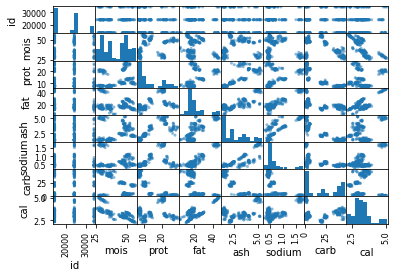

In [11]:
pd.plotting.scatter_matrix(data)

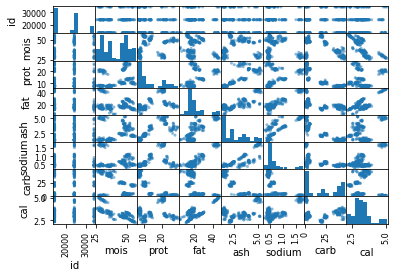

In [10]:
pd.plotting.scatter_matrix(data);

### ทดสอบว่า colum ใด ให้ข้อมูลซ้ำกับ colum อื่น แล้วลบออก

In [13]:
newdata = data.iloc[:,2:]    ### เลือกเฉพาะข้อมูลที่เป็นตัวเลข
newdata.head()    

,mois,prot,fat,ash,sodium,carb,cal
0,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,30.49,21.28,41.65,4.82,1.64,1.76,4.67


### ใช้ numpy ตรวจสอบว่าระหว่าง Column มี Correlation กันมากน้อยแค่ไหน

In [14]:
import numpy as np

In [20]:
corr = np.corrcoef(newdata.to_numpy().T)
corr

array([[ 1.        ,  0.36024768, -0.17131821,  0.26555552, -0.1022789 ,
        -0.59180165, -0.76444054],
       [ 0.36024768,  1.        ,  0.49800167,  0.8238437 ,  0.42912952,
        -0.85354226,  0.0702581 ],
       [-0.17131821,  0.49800167,  1.        ,  0.79163396,  0.93332522,
        -0.64023817,  0.7645671 ],
       [ 0.26555552,  0.8238437 ,  0.79163396,  1.        ,  0.80812215,
        -0.89898837,  0.32646845],
       [-0.1022789 ,  0.42912952,  0.93332522,  0.80812215,  1.        ,
        -0.62017634,  0.6719575 ],
       [-0.59180165, -0.85354226, -0.64023817, -0.89898837, -0.62017634,
         1.        , -0.02348458],
       [-0.76444054,  0.0702581 ,  0.7645671 ,  0.32646845,  0.6719575 ,
        -0.02348458,  1.        ]])

In [21]:
corr.shape

(7, 7)

In [26]:
for i in range(corr.shape[0]):
        for j in range(corr.shape[1]):
            if (i !=j )  and (corr[i,j] == 1.):
                print(f'row = {i} column = {j} corrcoef = {corr[i,j]}')  ### มีค่าไม่ซ้ำกัน

### plot กราฟ parallel corrdinate

In [34]:
from matplotlib import pyplot as plt

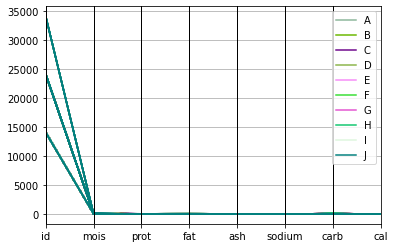

In [35]:
pd.plotting.parallel_coordinates(data,'brand') 

In [37]:
data_dropped = data.drop(['brand','id'], axis=1)    ### เอารายการที่เป็นรายชื่อออก
data_dropped

,mois,prot,fat,ash,sodium,carb,cal
0,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,30.49,21.28,41.65,4.82,1.64,1.76,4.67
...,...,...,...,...,...,...,...
295,44.91,11.07,17.00,2.49,0.66,25.36,2.91
296,43.15,11.79,18.46,2.43,0.67,24.17,3.10
297,44.55,11.01,16.03,2.43,0.64,25.98,2.92
298,47.60,10.43,15.18,2.32,0.56,24.47,2.76


### plot กราฟ parallel coordinate


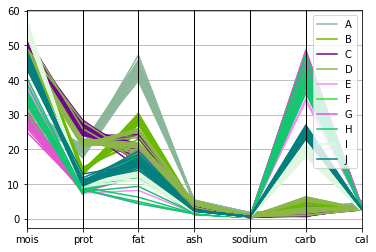

In [41]:
pd.plotting.parallel_coordinates(data_dropped,'brand')

## ทำ PCA เพื่อลดจำนวน dimension ของข้อมูล


In [42]:
from sklearn.decomposition import PCA

In [43]:
pca = PCA(n_components=2) 

In [45]:
new_pca = pca.fit_transform(data_dropped2.to_numpy())

In [46]:
new_pca

array([[-2.49517479e+01,  2.68116678e+01],
       [-2.46119758e+01,  2.56595634e+01],
       [-2.49384190e+01,  2.69305710e+01],
       [-2.43255609e+01,  2.35235671e+01],
       [-2.38660483e+01,  2.26528128e+01],
       [-2.42716473e+01,  2.25496261e+01],
       [-2.38806695e+01,  2.18852969e+01],
       [-2.23894923e+01,  2.39358506e+01],
       [-2.45074215e+01,  2.66033180e+01],
       [-2.50928469e+01,  2.71508163e+01],
       [-2.48185674e+01,  2.76159021e+01],
       [-2.39395254e+01,  2.75274080e+01],
       [-2.44496724e+01,  2.62221990e+01],
       [-2.28480039e+01,  2.27702098e+01],
       [-2.42812192e+01,  2.25656557e+01],
       [-2.38786302e+01,  2.39995991e+01],
       [-2.32390338e+01,  1.96576785e+01],
       [-2.36081213e+01,  1.88694931e+01],
       [-2.34833228e+01,  2.08403006e+01],
       [-2.30861647e+01,  2.25687679e+01],
       [-2.44317537e+01,  2.88343106e+01],
       [-2.39812139e+01,  2.72251577e+01],
       [-2.43513670e+01,  2.27327854e+01],
       [-2.

In [47]:
new_pca.shape

(300, 2)

### ดูว่า brand มีอะไรบ้าง

In [49]:
Pizza = set(data['brand'])
Pizza

{'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'}

### สร้าง Dictionary เพื่อแทนค่าที่เป็น text ให้เป็นตัวเลข เพื่อจะได้ plot สีได้

### แปลงเป็น list แล้วเรียงสมาชิกจากน้อยไปมาก

In [56]:
Pizza_l = list2(Pizza)
Pizza_l.sort() 
color_list = {}
num = 0
for each_pizza in Pizza_l:
  if each_pizza not in color_list2:
    color_list2[each_pizza] = num
    num+=1

In [58]:
color_list2

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9}

In [59]:
data_dropped = data.replace(color_list2)

In [60]:
data_dropped

,brand,id,mois,prot,fat,ash,sodium,carb,cal
0,0,14069,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,0,14053,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,0,14025,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,0,14016,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,0,14005,30.49,21.28,41.65,4.82,1.64,1.76,4.67
...,...,...,...,...,...,...,...,...,...
295,9,34044,44.91,11.07,17.00,2.49,0.66,25.36,2.91
296,9,24069,43.15,11.79,18.46,2.43,0.67,24.17,3.10
297,9,34039,44.55,11.01,16.03,2.43,0.64,25.98,2.92
298,9,14044,47.60,10.43,15.18,2.32,0.56,24.47,2.76


### plot กราฟ Scatter

In [62]:
from matplotlib import pyplot as plt

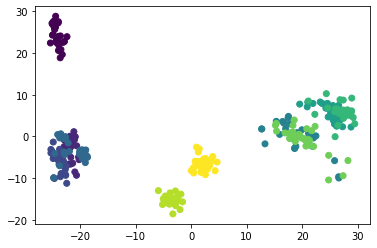

In [63]:
plt.scatter(new_pca[:,0],new_pca[:,1],c = data_dropped['brand'])

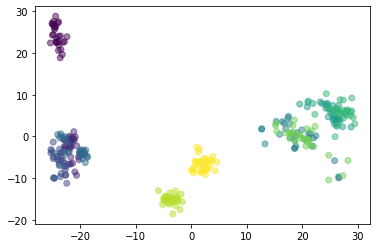

In [67]:
plt.scatter(new_pca[:,0],new_pca[:,1],c = data_dropped['brand'],alpha=0.5) ### alpha คือความโปร่งใส

### เปรียบเทียบสารอาหาร brand C และ G


In [80]:
CG = data_dropped[(data_dropped['brand']==3) | (data_dropped['brand']==6)]  
CG

,brand,id,mois,prot,fat,ash,sodium,carb,cal
87,3,14092,46.64,21.38,24.96,4.60,0.77,2.42,3.20
88,3,14081,45.93,21.60,25.87,4.51,0.73,2.09,3.28
89,3,14072,47.60,22.07,21.13,4.07,0.72,5.13,2.99
90,3,14116,47.61,22.44,19.61,4.06,0.60,6.28,2.91
91,3,14128,46.91,21.79,21.17,4.06,0.76,6.07,3.02
...,...,...,...,...,...,...,...,...,...
201,6,34008,26.45,7.89,17.97,1.30,0.39,46.39,3.79
202,6,34018,27.72,8.24,15.16,1.46,0.45,47.42,3.59
203,6,24059,25.00,8.49,16.87,1.45,0.47,48.19,3.79
204,6,34013,29.14,8.46,12.25,1.51,0.46,48.64,3.39


### ใช้ 2 dimention เปรียบเทียบแค่ 2 brand

In [85]:
pca = PCA(n_components=2)     
new_pca2 = pca.fit_transform(pz.iloc[:,1:].to_numpy())

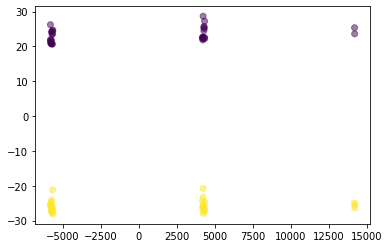

In [87]:
plt.scatter(new_pca2[:,0],new_pca2[:,1],c = pz['brand'],alpha=0.5)

In [89]:
prot_pca = pca.transform(pz[pz['brand']==3].iloc[:,1:].to_numpy())
cal_pca = pca.transform(pz[pz['brand']==6].iloc[:,1:].to_numpy())

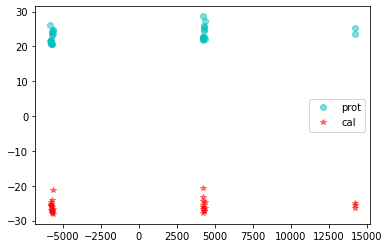

In [92]:
plt.plot(prot_pca[:,0],prot_pca[:,1],'oc',alpha=0.5,label='prot')
plt.plot(cal_pca[:,0],cal_pca[:,1],'*r',alpha=0.5,label='cal')
plt.legend()

In [93]:
pca.explained_variance_ratio_

array([9.99984988e-01, 1.48401818e-05])

### สร้างกราฟและตั้งชื่อกราฟ

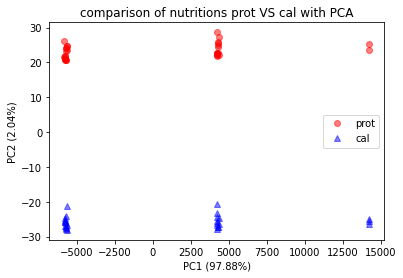

In [97]:
plt.plot(prot_pca[:,0],prot_pca[:,1],'or',alpha=0.5,label='prot')
plt.plot(cal_pca[:,0],cal_pca[:,1],'^b',alpha=0.5,label='cal')
plt.legend()
plt.title('comparison of nutritions prot VS cal with PCA')   ### ชื่อกราฟ
plt.xlabel('PC1 (97.88%)')   ### ชื่อแกน X
plt.ylabel('PC2 (2.04%)');  ### ชื่อแกน y

จากการเปรียบเทียบสารอาหารระหว่าง brand C และ brand G แล้ว PC1(97.88%) + PC2(2.04%) ได้ 99.92% ดังนั้น components จึงอธิบาย variance ได้ครอบคลุม